In [37]:
import re

In [63]:
f = open('table5', 'r')

# create list and add header
lines = ["Group, SN, Biomass, VM_a, FC_a, M_a, A_a, Sum_a, VM_b, FC_b, A_b, Sum_b, C_c, O_c, H_c, N_c, S_c, Sum_c, Cl_b, n, [Ref]\n"]

group = ''
# check if file is open for reading
if f.mode == 'r':
    fl = f.readlines()
    for line in fl:
        # valid record ends with "]" reference
        if line[0].isdigit():       
            if line.rfind("]") > 0:
                # replace "," with "|" for reference separator
                line = line.replace(",", "|")
                m = re.search(r" \d", line)
                if m is not None:
                    line = f'{line[:m.start()].replace(".",",")}{line[m.start():].replace(" ", ", ")}'
                    # check for cl
                    c = line.count(",")
                    if c < 19:
                        i = line.rfind(",")
                        j = line.rfind(",",0,i-1)
                        line = line[:j] + ", 0.0" + line[j:]
                        
                    line = group + ", " + line
                    lines.append(line)
            else:
                # print(line)
                x = re.search(r" [a-zA-Z]", line)
                if x:
                    group = line[:x.start()]
                # print(group)
                
                
f.close()

In [64]:
f = open("table5v1", "+w")
for line in lines:
    f.write(line)

f.close()

In [65]:
lines

['Group, SN, Biomass, VM_a, FC_a, M_a, A_a, Sum_a, VM_b, FC_b, A_b, Sum_b, C_c, O_c, H_c, N_c, S_c, Sum_c, Cl_b, n, [Ref]\n',
 '1., 1, Alder-fir sawdust, 36.3, 9.1, 52.6, 2.0, 100.0, 76.6, 19.2, 4.2, 100.0, 53.2, 40.2, 6.1, 0.5, 0.04, 100.04, 0.02, 1, [63]\n',
 '1., 2, Balsam bark, 70.9, 18.3, 8.4, 2.4, 100.0, 77.4, 20.0, 2.6, 100.0, 54.0, 39.5, 6.2, 0.2, 0.10, 100.00, 0.0, 1, [51]\n',
 '1., 3, Beech bark, 67.5, 17.0, 8.4, 7.1, 100.0, 73.7, 18.5, 7.8, 100.0, 51.4, 41.8, 6.0, 0.7, 0.11, 100.01, 0.0, 1, [51]\n',
 '1., 4, Birch bark, 71.9, 17.8, 8.4, 1.9, 100.0, 78.5, 19.4, 2.1, 100.0, 57.0, 35.7, 6.7, 0.5, 0.10, 100.00, 0.0, 2, [51]\n',
 '1., 5, Christmas trees, 46.1, 12.9, 37.8, 3.2, 100.0, 74.2, 20.7, 5.1, 100.0, 54.5, 38.7, 5.9, 0.5, 0.42, 100.02, 0.0, 1, [63]\n',
 '1., 6, Elm bark, 67.0, 17.2, 8.4, 7.4, 100.0, 73.1, 18.8, 8.1, 100.0, 50.9, 42.5, 5.8, 0.7, 0.11, 100.01, 0.0, 1, [51]\n',
 '1., 7, Eucalyptus bark, 68.7, 15.1, 12.0, 4.2, 100.0, 78.0, 17.2, 4.8, 100.0, 48.7, 45.3, 5.7, 0.

In [66]:
import pandas as pd

df = pd.read_csv("table5v1")
df

,Group,SN,Biomass,VM_a,FC_a,M_a,A_a,Sum_a,VM_b,FC_b,...,Sum_b,C_c,O_c,H_c,N_c,S_c,Sum_c,Cl_b,n,[Ref]
0,1.,1,Alder-fir sawdust,36.3,9.1,52.6,2.0,100.0,76.6,19.2,...,100.0,53.2,40.2,6.1,0.5,0.04,100.04,0.02,1,[63]
1,1.,2,Balsam bark,70.9,18.3,8.4,2.4,100.0,77.4,20.0,...,100.0,54.0,39.5,6.2,0.2,0.10,100.00,0.00,1,[51]
2,1.,3,Beech bark,67.5,17.0,8.4,7.1,100.0,73.7,18.5,...,100.0,51.4,41.8,6.0,0.7,0.11,100.01,0.00,1,[51]
3,1.,4,Birch bark,71.9,17.8,8.4,1.9,100.0,78.5,19.4,...,100.0,57.0,35.7,6.7,0.5,0.10,100.00,0.00,2,[51]
4,1.,5,Christmas trees,46.1,12.9,37.8,3.2,100.0,74.2,20.7,...,100.0,54.5,38.7,5.9,0.5,0.42,100.02,0.00,1,[63]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,7.,88,Peat,57.8,24.3,14.6,3.3,100.0,67.6,28.5,...,100.0,56.3,36.2,5.8,1.5,0.20,100.00,0.04,1,[74|75]
88,7.,89,Coal,30.8,43.9,5.5,19.8,100.0,32.8,46.3,...,100.0,78.2,13.6,5.2,1.3,1.70,100.00,0.03,37,[16|83]
89,7.,92,Lignite,32.8,25.7,10.5,31.0,100.0,36.7,28.7,...,100.0,64.0,23.7,5.5,1.0,5.80,100.00,0.01,5,[16|83]
90,7.,93,Sub-bituminous coal,33.4,34.1,8.2,24.3,100.0,36.4,37.2,...,100.0,74.4,17.7,5.6,1.4,0.90,100.00,0.03,10,[16|83]


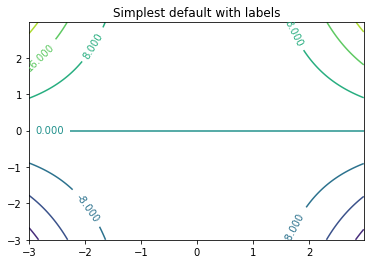

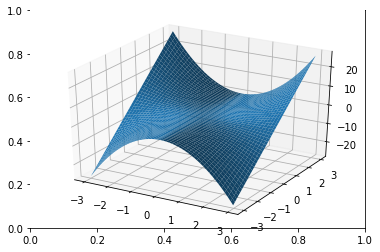

In [17]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = X**2 * Y

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

fig, ax = plt.subplots()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)


In [25]:
from scipy.optimize import fsolve
def func(x):
    return [x[0] + x[1] -2,
            3*x[0] - x[1] - 1]
root = fsolve(func, [1, 1])
root

array([0.75, 1.25])

In [35]:
from scipy.optimize import fsolve
def func2(x):
    return [1 - 2*x[0]*x[2],
            1 - 2*x[1]*x[2],
            1 - x[0]**2 - x[1]**2]
root = fsolve(func2, [-1, -1, 0])
root

array([-0.70710678, -0.70710678, -0.70710678])

In [24]:
np.sqrt(5)

2.23606797749979